# LA AQI Time Series work

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 3.9MB/s 
     |████████████████████████████████| 9.5MB 36.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the data

In [ ]:
lax = pd.read_csv('/content/lax.csv', index_col='Date')

In [ ]:
lax.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2015-01-01,California,Los Angeles,6,37,156,Unhealthy,PM2.5,06-037-1201,16
2015-01-02,California,Los Angeles,6,37,105,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,14
2015-01-03,California,Los Angeles,6,37,106,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,17
2015-01-04,California,Los Angeles,6,37,107,Unhealthy for Sensitive Groups,PM2.5,06-037-4004,16
2015-01-05,California,Los Angeles,6,37,57,Moderate,PM2.5,06-037-4004,16


In [ ]:
lax.tail()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2020-06-27,California,Los Angeles,6,37,119,Unhealthy for Sensitive Groups,Ozone,06-037-6012,16
2020-06-28,California,Los Angeles,6,37,42,Good,PM10,06-037-9033,16
2020-06-29,California,Los Angeles,6,37,44,Good,Ozone,06-037-6012,17
2020-06-30,California,Los Angeles,6,37,51,Moderate,Ozone,06-037-9033,16
2020-07-01,California,Los Angeles,6,37,2,Good,CO,06-037-2005,12


In [ ]:
lax.index = pd.to_datetime(lax.index)

In [ ]:
lax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 2009 non-null   object
 1   county Name                2009 non-null   object
 2   State Code                 2009 non-null   int64 
 3   County Code                2009 non-null   int64 
 4   AQI                        2009 non-null   int64 
 5   Category                   2009 non-null   object
 6   Defining Parameter         2009 non-null   object
 7   Defining Site              2009 non-null   object
 8   Number of Sites Reporting  2009 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 157.0+ KB


## Define train and test

In [ ]:
train = lax['AQI'].loc[:'2019']

In [ ]:
test = lax['AQI'].loc['2020']

## Create Holt-Winters model predicting AQI for 2020

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
predictions = pd.DataFrame(test)

In [ ]:
hw = ExponentialSmoothing(
    train,
    seasonal_periods=365,
    trend='mul',
    seasonal='mul'
).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [ ]:
hw.summary()

Dep. Variable:,AQI,No. Observations:,1826
Model:,ExponentialSmoothing,SSE,1651322.132
Optimized:,True,AIC,13167.954
Trend:,Multiplicative,BIC,15201.101
Seasonal:,Multiplicative,AICC,13357.792
Seasonal Periods:,365,Date:,"Wed, 19 May 2021"
Box-Cox:,False,Time:,20:08:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7828571,alpha,True
smoothing_trend,0.0001,beta,True


In [ ]:
predictions['hw'] = hw.forecast(len(test))

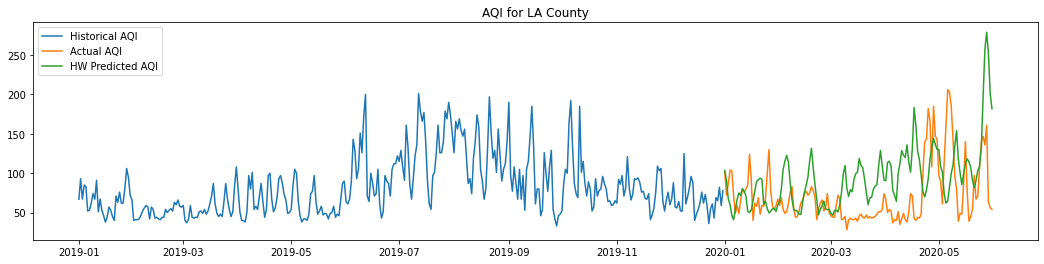

In [ ]:
plt.figure(figsize = (18, 4))
plt.plot(train.loc['2019'], label = 'Historical AQI')
plt.plot(predictions['AQI'].loc[:'2020-05'], label = 'Actual AQI')
plt.plot(predictions['hw'].loc[:'2020-05'], label = 'HW Predicted AQI')
plt.title('AQI for LA County')
plt.legend();

In [ ]:
predictions.to_csv('lax_daily_predictions.csv')

## Gonna try weekly now, see if that's any different

In [ ]:
train_wk = train.resample('W').mean()

In [ ]:
test_wk = test.resample('W').mean()

In [ ]:
train_wk.head()

Date
2015-01-04    118.500000
2015-01-11     80.000000
2015-01-18     81.714286
2015-01-25    102.285714
2015-02-01     63.142857
Freq: W-SUN, Name: AQI, dtype: float64

In [ ]:
hw2 = ExponentialSmoothing(
    train_wk,
    seasonal_periods=52,
    trend='add',
    seasonal='add'
).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
hw2.summary()

Dep. Variable:,AQI,No. Observations:,262
Model:,ExponentialSmoothing,SSE,78456.722
Optimized:,True,AIC,1605.913
Trend:,Additive,BIC,1805.740
Seasonal:,Additive,AICC,1639.627
Seasonal Periods:,52,Date:,"Wed, 19 May 2021"
Box-Cox:,False,Time:,20:15:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0775662,alpha,True
smoothing_trend,3.4064e-05,beta,True


In [ ]:
weekly_preds = pd.DataFrame(test_wk)

In [ ]:
weekly_preds['hw'] = hw2.forecast(len(test_wk))

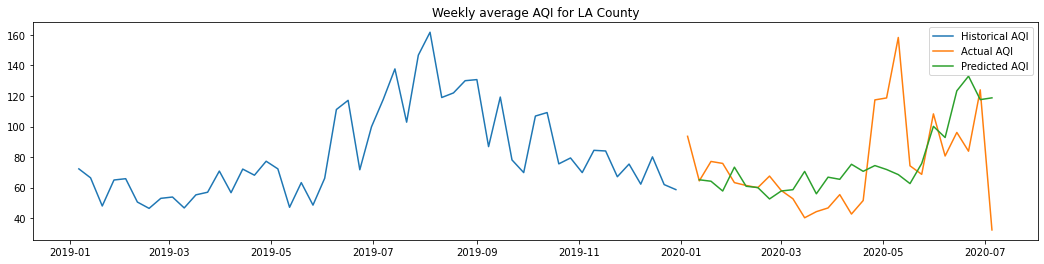

In [ ]:
plt.figure(figsize = (18, 4))
plt.plot(train_wk.loc['2019'], label = 'Historical AQI')
plt.plot(weekly_preds['AQI'], label = 'Actual AQI')
plt.plot(weekly_preds['hw'], label = 'Predicted AQI')
plt.title('Weekly average AQI for LA County')
plt.legend();

## Trying an Auto Arima model

In [ ]:
import pmdarima as pmd

In [ ]:
from pmdarima.utils import tsdisplay

/usr/local/lib/python3.7/dist-packages/pmdarima/utils/visualization.py:222: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


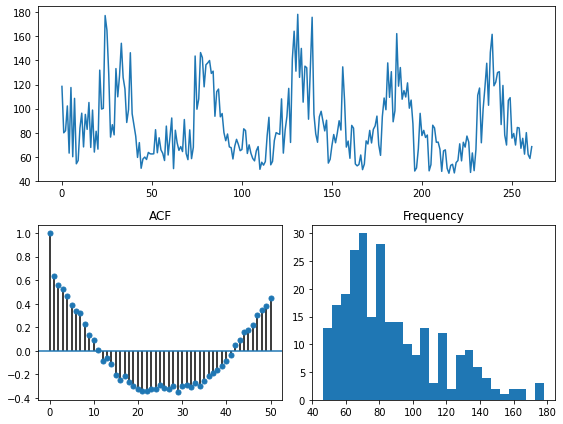

In [ ]:
tsdisplay(train_wk)

In [ ]:
train_wk

Date
2015-01-04    118.500000
2015-01-11     80.000000
2015-01-18     81.714286
2015-01-25    102.285714
2015-02-01     63.142857
                 ...    
2019-12-08     62.285714
2019-12-15     80.142857
2019-12-22     62.000000
2019-12-29     58.714286
2020-01-05     68.500000
Freq: W-SUN, Name: AQI, Length: 262, dtype: float64

In [ ]:
model = pmd.auto_arima(train_wk, m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=19.20 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2515.961, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2380.720, Time=5.43 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2417.306, Time=3.87 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3114.726, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2382.432, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2378.012, Time=33.13 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=2377.128, Time=49.92 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=11.22 sec
 ARIMA(1,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=52.11 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=2375.727, Time=45.71 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=2380.455, Time=17.77 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2381.716, Time=3.61 sec
 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=2413.580, Time=41.28 sec
 ARIMA(2,0,0)(1,0,2)[52] i

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  262
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 52)   Log Likelihood               -1170.493
Date:                                 Wed, 19 May 2021   AIC                           2354.985
Time:                                         20:04:46   BIC                           2379.964
Sample:                                              0   HQIC                          2365.025
                                                 - 262                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0663      4.195      0.731      0.465      -5.157      11.289
ar.L1          0.8601      0.052     16.539      0.000       0.758       0.962
ma.L1         -0.5178      0.087     -5.983      0.000      -0.687      -0.348
ar.S.L52       0.7463      0.314      2.377      0.017       0.131       1.362
ma.S.L52      -0.6636      0.344     -1.930      0.054      -1.338       0.010
ma.S.L104      0.1201      0.098      1.220      0.223      -0.073       0.313
sigma2       431.6810     35.766     12.069      0.000     361.580     501.782
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.24
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.81
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
preds=model.predict(test_wk.shape[0])

In [ ]:
test_wk.shape[0]

27

In [ ]:
weekly_preds['sarima'] = preds

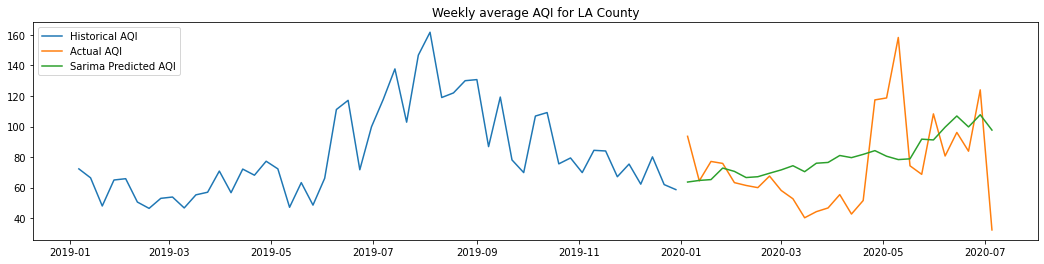

In [ ]:
plt.figure(figsize = (18, 4))
plt.plot(train_wk.loc['2019'], label = 'Historical AQI')
plt.plot(weekly_preds['AQI'], label = 'Actual AQI')
plt.plot(weekly_preds['sarima'], label = 'Sarima Predicted AQI')
plt.title('Weekly average AQI for LA County')
plt.legend();

In [ ]:
weekly_preds.to_csv('lax_weekly_predictions.csv')

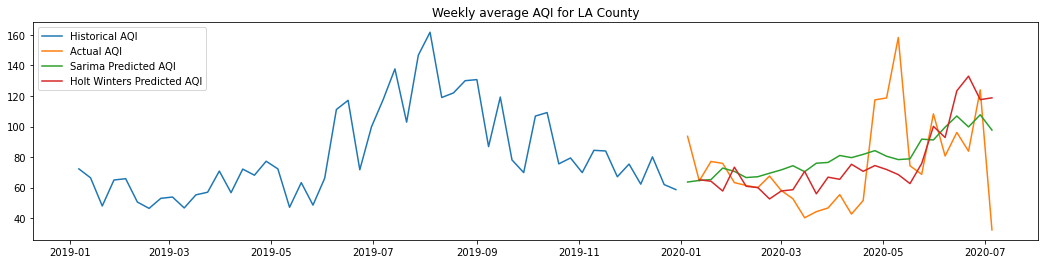

In [ ]:
plt.figure(figsize = (18, 4))
plt.plot(train_wk.loc['2019'], label = 'Historical AQI')
plt.plot(weekly_preds['AQI'], label = 'Actual AQI')
plt.plot(weekly_preds['sarima'], label = 'Sarima Predicted AQI')
plt.plot(weekly_preds['hw'], label = 'Holt Winters Predicted AQI')
plt.title('Weekly average AQI for LA County')
plt.legend();

In [ ]:
weekly = pd.concat((pd.DataFrame(data=train_wk, columns=['AQI']), pd.DataFrame(data=test_wk, columns=['AQI'])))

In [ ]:
weekly

,AQI
Date,
2015-01-04,118.500000
2015-01-11,80.000000
2015-01-18,81.714286
2015-01-25,102.285714
2015-02-01,63.142857
...,...
2020-06-07,80.714286
2020-06-14,96.142857
2020-06-21,83.857143


In [ ]:
weekly.to_csv('lax_weekly_2015_2020.csv')